In [2]:
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"

import sys
sys.path.append("..")

import pandas as pd
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [19]:
metadata = pd.read_csv("./raw/metadata.txt", sep=";")
aligned = pd.read_csv("./raw/aligned.txt", sep=",", header=None)

In [20]:
metadata

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,mediaType,issue,gbif_species_to_verbatim,Specimen.ID,Bnet.UI,Familiy_kawahara,Genus_kawahara,Species_kawahara,kawahara_index,phy_tip_name
0,4060703481,f3130a8a-4508-42b4-9737-fbda77748438,https://data.biodiversitydata.nl/naturalis/spe...,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,Atrophaneura,Atrophaneura semperi,...,StillImage;StillImage,COUNTRY_COORDINATE_MISMATCH;TAXON_MATCH_HIGHER...,Atrophaneura semperi,LEP32867,BN002196,Papilionidae,Atrophaneura,semperi,1844,BN002196_LEP32867_Papilionidae_Papilioninae_Tr...
1,814090196,4bfac3ea-8763-4f4b-a71a-76a6f5f243d3,MCZ:Ent:173703,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,Atrophaneura,Atrophaneura dixoni,...,StillImage,CONTINENT_COORDINATE_MISMATCH;INSTITUTION_MATC...,Atrophaneura dixoni,SRR8954516,NaN,Papilionidae,Atrophaneura,dixoni,1845,SRR8954516_Atrophaneura_dixoni
2,814089868,4bfac3ea-8763-4f4b-a71a-76a6f5f243d3,MCZ:Ent:173684,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,Byasa,Byasa alcinous,...,StillImage,INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY,Byasa alcinous,LEP36333,BN005195,Papilionidae,Byasa,alcinous,1843,BN005195_LEP36333_Papilionidae_Papilioninae_Tr...
3,2847250303,f8acba56-93a4-4de3-a407-00e57337822e,ZRC_ENT00024482,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,Losaria,Losaria coon,...,StillImage;StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...,Losaria coon doubledayi,YI-16-P041,BN006868,Papilionidae,Losaria,coon,1848,BN006868_YI16P041_Papilionidae_Papilioninae_Tr...
4,2517941031,ab67e429-389c-43a7-8799-36c67ece82d6,http://inabif.lipi.go.id/kehati/mzb/MZB.LEPI.4...,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,Pachliopta,Pachliopta aristolochiae,...,StillImage;StillImage,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,Pachliopta aristolochiae,LEP31648,NaN,Papilionidae,Pachliopta,aristolochiae,1846,LEP31648_Pachliopta_aristolochiae_ME
5,1319018957,821cc27a-e3bb-4bc5-ac34-89ada245069d,http://n2t.net/ark:/65665/3505935d2-8be4-4420-...,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,Pachliopta,Pachliopta kotzebuea,...,StillImage;StillImage;StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...,Pachliopta kotzebuea,SRR8954525,NaN,Papilionidae,Pachliopta,kotzebuea,1847,SRR8954525_Pachliopta_kotzebuea
6,1099993788,4bfac3ea-8763-4f4b-a71a-76a6f5f243d3,MCZ:Ent:180615,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,Parides,Parides agavus,...,StillImage,INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY,Parides agavus,LEP53130,BN005317,Papilionidae,Parides,agavus,1839,BN005317_LEP53130_Papilionidae_Papilioninae_Tr...
7,1457664791,9be3b97c-bc8c-490c-8021-dc7c75408076,961be4cb-f5a2-40e0-8868-27299521140d,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,Parides,Parides photinus,...,StillImage;StillImage,CONTINENT_DERIVED_FROM_COORDINATES;INSTITUTION...,Parides photinus,SRR8954530,NaN,Papilionidae,Parides,photinus,1840,SRR8954530_Parides_photinus
8,925594984,4bfac3ea-8763-4f4b-a71a-76a6f5f243d3,MCZ:Ent:173595,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,Parides,Parides eurimedes,...,StillImage,INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY,Parides eurimedes,SRR921629,NaN,Papilionidae,Parides,eurimedes,1841,SRR921629_Papilionoidea_Parides_eurimedes
9,3093960310,4bfac3ea-8763-4f4b-a71a-76a6f5f243d3,MCZ:Ent:173033,Animalia,Arthropoda,Insecta,Lepidoptera,Papilionidae,Euryades,Euryades corethrus,...,StillImage,INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY,Euryades corethrus,SRR8954508,NaN,Papilionidae,Euryades,corethrus,1838,SRR8954508_Euryades_corethrus


In [31]:
for name in metadata["species"]:
    print(name.lower().replace(" ", "_"))

atrophaneura_semperi
atrophaneura_dixoni
byasa_alcinous
losaria_coon
pachliopta_aristolochiae
pachliopta_kotzebuea
parides_agavus
parides_photinus
parides_eurimedes
euryades_corethrus
cressida_cressida
troides_rhadamantus
ornithoptera_richmondia
trogonoptera_brookiana
pharmacophagus_antenor
battus_polydamas
papilio_slateri
papilio_polyxenes
papilio_zelicaon
papilio_xuthus
papilio_protenor
papilio_polytes
papilio_ambrax
papilio_deiphobus
papilio_gigon
teinopalpus_imperialis
mimoides_xynias
protographium_marcellus
protesilaus_protesilaus
graphium_sarpedon
graphium_agamemnon
graphium_evemon
graphium_androcles
lamproptera_curius
lamproptera_meges
iphiclides_podalirius
bhutanitis_thaidina
zerynthia_polyxena
allancastria_cerisyi
sericinus_montela
archon_apollinus
luehdorfia_puziloi
parnassius_orleans


In [33]:
for name in metadata["species"]:
    pts_flatten = jnp.array(aligned.loc[metadata["species"] == name])[0]
    pts = pts_flatten.reshape((-1, 2)) * (0.5/0.1) + 0.5
    save_name = name.lower().replace(" ", "_")
    jnp.save(f"./raw/{save_name}.npy", pts)

In [34]:
atrophaneura_semperi = jnp.load("./raw/atrophaneura_semperi.npy")
byasa_alcinous = jnp.load("./raw/byasa_alcinous.npy")

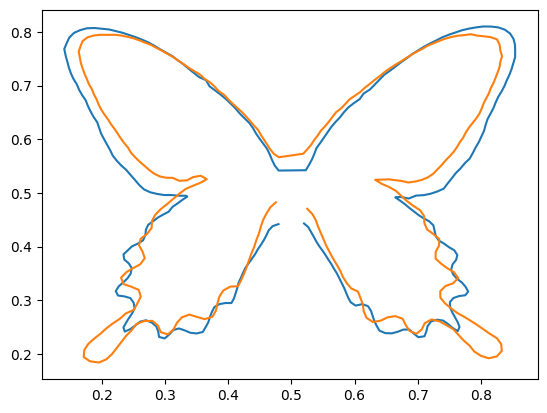

In [35]:
plt.plot(atrophaneura_semperi[:, 0], atrophaneura_semperi[:, 1])
plt.plot(byasa_alcinous[:, 0], byasa_alcinous[:, 1])